# Kiểm tra thông tin dataset

## 1. Khai báo đường dẫn 

In [5]:
import os, glob

PROJECT_DIR = r"D:\Code\PythonProject\Advanced\multi_task_ct"
RAW_DIR = os.path.join(PROJECT_DIR, "data", "raw")

COVID_INF_DIR = os.path.join(RAW_DIR, "covid_lung_infection", "COVID-19-CT-Seg_20cases")
COVID19_NORMAL_ROOT = os.path.join(RAW_DIR, "covid19_normal")
ORG_COVID_DIR = os.path.join(COVID19_NORMAL_ROOT, "Organized COVID19 CT Data_rev2")
ORG_NORMAL_DIR = os.path.join(COVID19_NORMAL_ROOT, "Organized Normal CT Data")

print("RAW_DIR        :", RAW_DIR)
print("COVID_INF_DIR  :", COVID_INF_DIR)
print("ORG_COVID_DIR  :", ORG_COVID_DIR)
print("ORG_NORMAL_DIR :", ORG_NORMAL_DIR)

RAW_DIR        : D:\Code\PythonProject\Advanced\multi_task_ct\data\raw
COVID_INF_DIR  : D:\Code\PythonProject\Advanced\multi_task_ct\data\raw\covid_lung_infection\COVID-19-CT-Seg_20cases
ORG_COVID_DIR  : D:\Code\PythonProject\Advanced\multi_task_ct\data\raw\covid19_normal\Organized COVID19 CT Data_rev2
ORG_NORMAL_DIR : D:\Code\PythonProject\Advanced\multi_task_ct\data\raw\covid19_normal\Organized Normal CT Data


## 2. In cây thư mục 

### 2.1 Loại 1

In [ ]:
import os

def print_tree_smart(root, prefix="", max_items=3):
    """
    In cây thư mục tối ưu:
    - Duyệt đệ quy đến tận cùng
    - Mỗi folder chỉ hiển thị tối đa max_items item (folder + file)
    - Nếu còn item phía dưới => in "... (N more)"
    """
    try:
        items = sorted(os.listdir(root))
    except PermissionError:
        print(prefix + "🚫 [No Access]")
        return

    count = len(items)
    shown_items = items[:max_items]

    for item in shown_items:
        path = os.path.join(root, item)
        if os.path.isdir(path):
            print(prefix + f"📁 {item}")
            print_tree_smart(path, prefix + "   ", max_items)
        else:
            print(prefix + f"📄 {item}")

    # Nếu còn nhiều hơn max_items
    if count > max_items:
        print(prefix + f"... ({count - max_items} more)")

In [4]:
RAW_DIR = os.path.join(PROJECT_DIR, "data", "raw")

print("📂 Dataset structure:")
print_tree_smart(RAW_DIR, max_items=3)

📂 Dataset structure:
📁 covid19_normal
   📁 Organized COVID19 CT Data_rev2
      📁 Part 1
         📁 CT Labels
            📄 p100_lns003i00001.hdr
            📄 p100_lns003i00001.img
            📄 p100_lns003i00001.roi
            ... (441 more)
         📄 p100_ns002i00001.hdr
         📄 p100_ns002i00001.img
         ... (294 more)
      📁 Part 2
         📄 10_ns008i00001.hdr
         📄 10_ns008i00001.img
         📄 11_ns002i00001.hdr
         ... (162 more)
   📁 Organized Normal CT Data
      📄 100_ns002i00001.hdr
      📄 100_ns002i00001.img
      📄 102_ns002i00001.hdr
      ... (295 more)
📁 covid_lung_infection
   📁 COVID-19-CT-Seg_20cases
      📄 coronacases_001.nii
      📄 coronacases_002.nii
      📄 coronacases_003.nii
      ... (17 more)
   📁 Infection_Mask
      📄 coronacases_001.nii
      📄 coronacases_002.nii
      📄 coronacases_003.nii
      ... (17 more)
   📁 Lung_Mask
      📄 coronacases_001.nii
      📄 coronacases_002.nii
      📄 coronacases_003.nii
      ... (17 more)
   .

### 2.2 Loại 2

In [6]:
def print_tree_smart(root, prefix="", max_items=3):
    items = sorted(os.listdir(root))
    count = len(items)
    shown = items[:max_items]

    for name in shown:
        path = os.path.join(root, name)
        if os.path.isdir(path):
            print(prefix + "📁 " + name)
            print_tree_smart(path, prefix + "   ", max_items)
        else:
            print(prefix + "📄 " + name)

    if count > max_items:
        print(prefix + f"... ({count - max_items} more)")

print("📂 Dataset structure:")
print_tree_smart(RAW_DIR, max_items=3)

📂 Dataset structure:
📁 covid19_normal
   📁 Organized COVID19 CT Data_rev2
      📁 Part 1
         📁 CT Labels
            📄 p100_lns003i00001.hdr
            📄 p100_lns003i00001.img
            📄 p100_lns003i00001.roi
            ... (441 more)
         📄 p100_ns002i00001.hdr
         📄 p100_ns002i00001.img
         ... (294 more)
      📁 Part 2
         📄 10_ns008i00001.hdr
         📄 10_ns008i00001.img
         📄 11_ns002i00001.hdr
         ... (162 more)
   📁 Organized Normal CT Data
      📄 100_ns002i00001.hdr
      📄 100_ns002i00001.img
      📄 102_ns002i00001.hdr
      ... (295 more)
📁 covid_lung_infection
   📁 COVID-19-CT-Seg_20cases
      📄 coronacases_001.nii
      📄 coronacases_002.nii
      📄 coronacases_003.nii
      ... (17 more)
   📁 Infection_Mask
      📄 coronacases_001.nii
      📄 coronacases_002.nii
      📄 coronacases_003.nii
      ... (17 more)
   📁 Lung_Mask
      📄 coronacases_001.nii
      📄 coronacases_002.nii
      📄 coronacases_003.nii
      ... (17 more)
   .

## 3. Kiểm tra thông tin bộ covid_lung_infection

### 3.1 Kiểm tra định dạng dữ liệu 

In [7]:
import os
import glob
import nibabel as nib

COVID_INF_DIR = os.path.join(RAW_DIR, "covid_lung_infection", "COVID-19-CT-Seg_20cases")
print("📂 Kiểm tra thư mục:", COVID_INF_DIR)

# Tìm định dạng file
nii_files = glob.glob(os.path.join(COVID_INF_DIR, "**", "*.nii"), recursive=True)
nii_gz_files = glob.glob(os.path.join(COVID_INF_DIR, "**", "*.nii.gz"), recursive=True)
hdr_files = glob.glob(os.path.join(COVID_INF_DIR, "**", "*.hdr"), recursive=True)
img_files = glob.glob(os.path.join(COVID_INF_DIR, "**", "*.img"), recursive=True)
dcm_files = glob.glob(os.path.join(COVID_INF_DIR, "**", "*.dcm"), recursive=True)
png_files = glob.glob(os.path.join(COVID_INF_DIR, "**", "*.png"), recursive=True)
jpg_files = glob.glob(os.path.join(COVID_INF_DIR, "**", "*.jpg"), recursive=True)

# In thống kê
print("\n===== TỔNG QUAN ĐỊNH DẠNG FILE =====")
print(f"🩻 .nii       : {len(nii_files)}")
print(f"🩻 .nii.gz    : {len(nii_gz_files)}")
print(f"📄 .hdr       : {len(hdr_files)}")
print(f"📄 .img       : {len(img_files)}")
print(f"🖼️ .dcm       : {len(dcm_files)}")
print(f"🖼️ .png       : {len(png_files)}")
print(f"🖼️ .jpg       : {len(jpg_files)}")
print("=====================================")

# Nếu có .nii → load thử để xem file có hợp lệ 3D không
if len(nii_files) > 0:
    print("\n🔍 Kiểm tra file .nii đầu tiên:")
    sample = nii_files[0]
    print("File:", sample)

    img = nib.load(sample)
    arr = img.get_fdata()

    print("Shape:", arr.shape)
    print("Min/Max:", arr.min(), arr.max())

# In một vài file ví dụ
print("\n===== VÍ DỤ FILE =====")
for f in nii_files[:5]:
    print("🩻", f)

for f in hdr_files[:5]:
    print("📄 HDR", f)

for f in img_files[:5]:
    print("📄 IMG", f)

📂 Kiểm tra thư mục: D:\Code\PythonProject\Advanced\multi_task_ct\data\raw\covid_lung_infection\COVID-19-CT-Seg_20cases

===== TỔNG QUAN ĐỊNH DẠNG FILE =====
🩻 .nii       : 20
🩻 .nii.gz    : 0
📄 .hdr       : 0
📄 .img       : 0
🖼️ .dcm       : 0
🖼️ .png       : 0
🖼️ .jpg       : 0

🔍 Kiểm tra file .nii đầu tiên:
File: D:\Code\PythonProject\Advanced\multi_task_ct\data\raw\covid_lung_infection\COVID-19-CT-Seg_20cases\coronacases_001.nii
Shape: (512, 512, 301)
Min/Max: -1021.0 2996.0

===== VÍ DỤ FILE =====
🩻 D:\Code\PythonProject\Advanced\multi_task_ct\data\raw\covid_lung_infection\COVID-19-CT-Seg_20cases\coronacases_001.nii
🩻 D:\Code\PythonProject\Advanced\multi_task_ct\data\raw\covid_lung_infection\COVID-19-CT-Seg_20cases\coronacases_002.nii
🩻 D:\Code\PythonProject\Advanced\multi_task_ct\data\raw\covid_lung_infection\COVID-19-CT-Seg_20cases\coronacases_003.nii
🩻 D:\Code\PythonProject\Advanced\multi_task_ct\data\raw\covid_lung_infection\COVID-19-CT-Seg_20cases\coronacases_004.nii
🩻 D:\Cod

### 3.2 Kiểm tra đủ mask và label không?

#### (A) Cấu hình đường dẫn

In [8]:
COVID_LUNG_INFECTION = os.path.join(RAW_DIR, "covid_lung_infection")


CT_DIR               = os.path.join(COVID_LUNG_INFECTION, "COVID-19-CT-Seg_20cases")
MASK_LUNG_DIR        = os.path.join(COVID_LUNG_INFECTION, "Lung_Mask")        
MASK_LUNG_INF_DIR    = os.path.join(COVID_LUNG_INFECTION, "Lung_and_Infection_Mask")   
MASK_INF_DIR         = os.path.join(COVID_LUNG_INFECTION, "Infection_Mask")

print("CT_DIR           :", CT_DIR)
print("MASK_LUNG_DIR    :", MASK_LUNG_DIR)
print("MASK_LUNG_INF_DIR:", MASK_LUNG_INF_DIR)
print("MASK_INF_DIR     :", MASK_INF_DIR)


CT_DIR           : D:\Code\PythonProject\Advanced\multi_task_ct\data\raw\covid_lung_infection\COVID-19-CT-Seg_20cases
MASK_LUNG_DIR    : D:\Code\PythonProject\Advanced\multi_task_ct\data\raw\covid_lung_infection\Lung_Mask
MASK_LUNG_INF_DIR: D:\Code\PythonProject\Advanced\multi_task_ct\data\raw\covid_lung_infection\Lung_and_Infection_Mask
MASK_INF_DIR     : D:\Code\PythonProject\Advanced\multi_task_ct\data\raw\covid_lung_infection\Infection_Mask


#### (B) Kiểm tra số lượng và tên file trong từng folder

In [9]:
import glob
import os

def list_nii(dir_path, label):
    files = sorted(glob.glob(os.path.join(dir_path, "*.nii")))
    print(f"{label}: {len(files)} files")
    for f in files[:5]:
        print("  -", os.path.basename(f))
    if len(files) > 5:
        print(f"  ... ({len(files)-5} more)")
    return files

ct_files        = list_nii(CT_DIR, "CT")
lung_files      = list_nii(MASK_LUNG_DIR, "LUNG MASK")
lung_inf_files  = list_nii(MASK_LUNG_INF_DIR, "LUNG+INF MASK")
inf_files       = list_nii(MASK_INF_DIR, "INF MASK")

CT: 20 files
  - coronacases_001.nii
  - coronacases_002.nii
  - coronacases_003.nii
  - coronacases_004.nii
  - coronacases_005.nii
  ... (15 more)
LUNG MASK: 20 files
  - coronacases_001.nii
  - coronacases_002.nii
  - coronacases_003.nii
  - coronacases_004.nii
  - coronacases_005.nii
  ... (15 more)
LUNG+INF MASK: 20 files
  - coronacases_001.nii
  - coronacases_002.nii
  - coronacases_003.nii
  - coronacases_004.nii
  - coronacases_005.nii
  ... (15 more)
INF MASK: 20 files
  - coronacases_001.nii
  - coronacases_002.nii
  - coronacases_003.nii
  - coronacases_004.nii
  - coronacases_005.nii
  ... (15 more)


#### (C) Kiểm tra mapping CT <-> mask có khớp không?

In [10]:
def stem(path):
    return os.path.splitext(os.path.basename(path))[0]

ct_ids       = set(stem(f) for f in ct_files)
lung_ids     = set(stem(f) for f in lung_files)
lung_inf_ids = set(stem(f) for f in lung_inf_files)
inf_ids      = set(stem(f) for f in inf_files)

print("CT ids       :", len(ct_ids))
print("Lung ids     :", len(lung_ids))
print("Lung+Inf ids :", len(lung_inf_ids))
print("Inf ids      :", len(inf_ids))

print("\nCT without Lung mask:", ct_ids - lung_ids)
print("Lung mask without CT:", lung_ids - ct_ids)

print("\nCT without Inf mask:", ct_ids - inf_ids)
print("Inf mask without CT:", inf_ids - ct_ids)

CT ids       : 20
Lung ids     : 20
Lung+Inf ids : 20
Inf ids      : 20

CT without Lung mask: set()
Lung mask without CT: set()

CT without Inf mask: set()
Inf mask without CT: set()


#### (D) Kiểm tra shape + giá trị unique của từng mask

In [11]:
import nibabel as nib
import numpy as np

def inspect_volume(path, label):
    img = nib.load(path)
    data = img.get_fdata()
    print(f"\n🔍 {label}: {os.path.basename(path)}")
    print("  Shape:", data.shape)
    print("  Min/Max:", data.min(), data.max())
    uniq = np.unique(data)
    print("  Unique values:", uniq[:10], "..." if len(uniq) > 10 else "")
    return data

# lấy mẫu 1 case (giả sử index 0)
ct_sample       = ct_files[0]
lung_sample     = lung_files[0]      if lung_files else None
lung_inf_sample = lung_inf_files[0]  if lung_inf_files else None
inf_sample      = inf_files[0]       if inf_files else None

ct_data = inspect_volume(ct_sample, "CT")

if lung_sample:
    lung_data = inspect_volume(lung_sample, "LUNG MASK")
if lung_inf_sample:
    lung_inf_data = inspect_volume(lung_inf_sample, "LUNG+INF MASK")
if inf_sample:
    inf_data = inspect_volume(inf_sample, "INF MASK")


🔍 CT: coronacases_001.nii
  Shape: (512, 512, 301)
  Min/Max: -1021.0 2996.0
  Unique values: [-1021. -1020. -1019. -1018. -1017. -1016. -1015. -1014. -1013. -1012.] ...

🔍 LUNG MASK: coronacases_001.nii
  Shape: (512, 512, 301)
  Min/Max: 0.0 2.0
  Unique values: [0. 1. 2.] 

🔍 LUNG+INF MASK: coronacases_001.nii
  Shape: (512, 512, 301)
  Min/Max: 0.0 3.0
  Unique values: [0. 1. 2. 3.] 

🔍 INF MASK: coronacases_001.nii
  Shape: (512, 512, 301)
  Min/Max: 0.0 1.0
  Unique values: [0. 1.] 


#### (E) Đường dẫn folder và duyệt qua tất cả các case

In [12]:
# Lấy danh sách file 
import os, glob

ct_files        = sorted(glob.glob(os.path.join(CT_DIR, "*.nii")))
lung_files      = sorted(glob.glob(os.path.join(MASK_LUNG_DIR, "*.nii")))
lung_inf_files  = sorted(glob.glob(os.path.join(MASK_LUNG_INF_DIR, "*.nii")))
inf_files       = sorted(glob.glob(os.path.join(MASK_INF_DIR, "*.nii")))

def basename_no_ext(p):
    return os.path.splitext(os.path.basename(p))[0]

print(f"Số CT       : {len(ct_files)}")
print(f"Số Lung     : {len(lung_files)}")
print(f"Số Lung+Inf : {len(lung_inf_files)}")
print(f"Số Inf      : {len(inf_files)}")

Số CT       : 20
Số Lung     : 20
Số Lung+Inf : 20
Số Inf      : 20


In [13]:
import nibabel as nib

mismatch_cases = []   # lưu case nào bị lệch shape
slice_counts = []     # (case_id, Z)
size_summary = []     # (case_id, ct_shape, lung_shape, lung_inf_shape, inf_shape)

for ct_path in ct_files:
    case_id = basename_no_ext(ct_path)

    lung_path     = os.path.join(MASK_LUNG_DIR,        case_id + ".nii")
    lung_inf_path = os.path.join(MASK_LUNG_INF_DIR,    case_id + ".nii")
    inf_path      = os.path.join(MASK_INF_DIR,         case_id + ".nii")

    # load CT
    ct_arr   = nib.load(ct_path).get_fdata()
    ct_shape = ct_arr.shape

    # load mask nếu tồn tại
    lung_shape = nib.load(lung_path).get_fdata().shape if os.path.exists(lung_path) else None
    lung_inf_shape = nib.load(lung_inf_path).get_fdata().shape if os.path.exists(lung_inf_path) else None
    inf_shape  = nib.load(inf_path).get_fdata().shape if os.path.exists(inf_path) else None

    size_summary.append((case_id, ct_shape, lung_shape, lung_inf_shape, inf_shape))
    slice_counts.append((case_id, ct_shape[2]))

    # kiểm tra lệch shape so với CT
    for s in [lung_shape, lung_inf_shape, inf_shape]:
        if s is not None and s != ct_shape:
            mismatch_cases.append((case_id, ct_shape, lung_shape, lung_inf_shape, inf_shape))
            break

print("✅ Đã duyệt xong tất cả case.")


✅ Đã duyệt xong tất cả case.


#### (F) In kết quả kiểm tra & kích thước từng case

In [14]:
print("===== KIỂM TRA LỆCH SHAPE / SỐ SLICE =====")
if not mismatch_cases:
    print("✅ Tất cả mask có shape trùng với CT (H, W, Z).")
else:
    print(f"⚠️ Có {len(mismatch_cases)} case bị lệch shape:")
    for case_id, ct_s, lung_s, lung_inf_s, inf_s in mismatch_cases:
        print(f"- {case_id}: CT={ct_s}, Lung={lung_s}, Lung+Inf={lung_inf_s}, Inf={inf_s}")

print("\n===== KÍCH THƯỚC (H, W, Z) TỪNG CASE =====")
for case_id, ct_s, lung_s, lung_inf_s, inf_s in size_summary:
    print(f"\n📌 Case: {case_id}")
    print(f"   CT        : {ct_s}")
    print(f"   Lung Mask : {lung_s}")
    print(f"   Lung+Inf  : {lung_inf_s}")
    print(f"   Inf Mask  : {inf_s}")

===== KIỂM TRA LỆCH SHAPE / SỐ SLICE =====
✅ Tất cả mask có shape trùng với CT (H, W, Z).

===== KÍCH THƯỚC (H, W, Z) TỪNG CASE =====

📌 Case: coronacases_001
   CT        : (512, 512, 301)
   Lung Mask : (512, 512, 301)
   Lung+Inf  : (512, 512, 301)
   Inf Mask  : (512, 512, 301)

📌 Case: coronacases_002
   CT        : (512, 512, 200)
   Lung Mask : (512, 512, 200)
   Lung+Inf  : (512, 512, 200)
   Inf Mask  : (512, 512, 200)

📌 Case: coronacases_003
   CT        : (512, 512, 200)
   Lung Mask : (512, 512, 200)
   Lung+Inf  : (512, 512, 200)
   Inf Mask  : (512, 512, 200)

📌 Case: coronacases_004
   CT        : (512, 512, 270)
   Lung Mask : (512, 512, 270)
   Lung+Inf  : (512, 512, 270)
   Inf Mask  : (512, 512, 270)

📌 Case: coronacases_005
   CT        : (512, 512, 290)
   Lung Mask : (512, 512, 290)
   Lung+Inf  : (512, 512, 290)
   Inf Mask  : (512, 512, 290)

📌 Case: coronacases_006
   CT        : (512, 512, 213)
   Lung Mask : (512, 512, 213)
   Lung+Inf  : (512, 512, 213)
   

#### (G) Lấy ra danh sách các size ảnh

In [17]:
import nibabel as nib
from collections import defaultdict

# Dictionary: key = (H, W), value = list case IDs
hw_groups = defaultdict(list)

for ct_path in ct_files:
    case_id = basename_no_ext(ct_path)

    # load CT
    ct_arr = nib.load(ct_path).get_fdata()
    H, W, Z = ct_arr.shape

    hw_groups[(H, W)].append(case_id)

# In kết quả
print("===== THỐNG KÊ THEO SIZE (H x W) =====\n")

for (H, W), cases in sorted(hw_groups.items()):
    print(f"📐 Size: ({H}, {W})  —  {len(cases)} case")
    for c in cases:
        print(f"   • {c}")
    print()

===== THỐNG KÊ THEO SIZE (H x W) =====

📐 Size: (512, 512)  —  10 case
   • coronacases_001
   • coronacases_002
   • coronacases_003
   • coronacases_004
   • coronacases_005
   • coronacases_006
   • coronacases_007
   • coronacases_008
   • coronacases_009
   • coronacases_010

📐 Size: (630, 401)  —  1 case
   • radiopaedia_14_85914_0

📐 Size: (630, 630)  —  9 case
   • radiopaedia_10_85902_1
   • radiopaedia_10_85902_3
   • radiopaedia_27_86410_0
   • radiopaedia_29_86490_1
   • radiopaedia_29_86491_1
   • radiopaedia_36_86526_0
   • radiopaedia_40_86625_0
   • radiopaedia_4_85506_1
   • radiopaedia_7_85703_0



#### (H) Vẽ đồ thị số slice (Z) của 20 CT

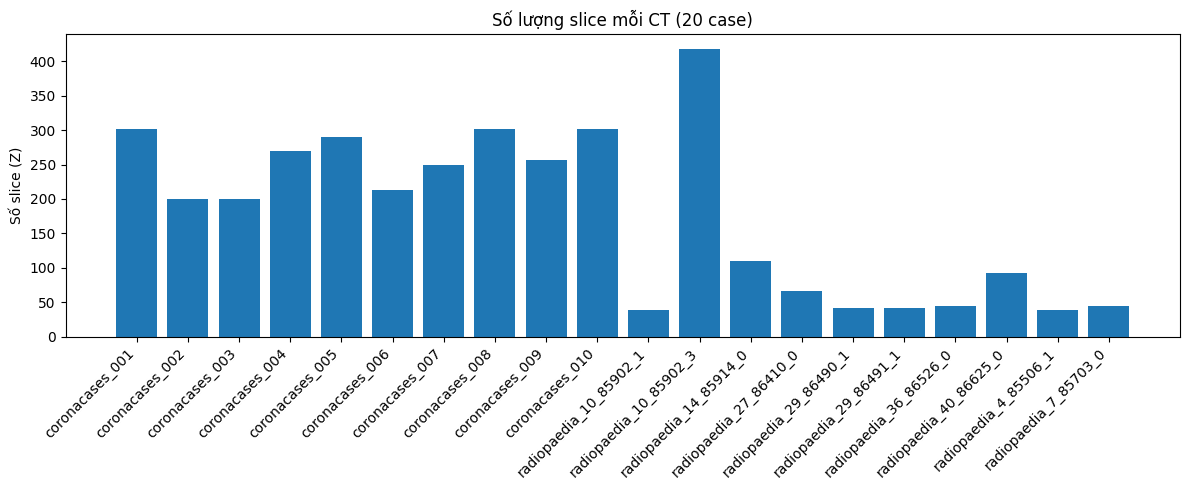

In [15]:
import matplotlib.pyplot as plt

case_ids = [cid for cid, z in slice_counts]
z_slices = [z for cid, z in slice_counts]

plt.figure(figsize=(12, 5))
plt.bar(range(len(z_slices)), z_slices)
plt.xticks(range(len(z_slices)), case_ids, rotation=45, ha='right')
plt.ylabel("Số slice (Z)")
plt.title("Số lượng slice mỗi CT (20 case)")
plt.tight_layout()
plt.show()

#### (I) Lấy spacing từng CT

In [18]:
import nibabel as nib
import numpy as np

voxel_stats = []   # lưu (case_id, (sx, sy, sz))

for ct_path in ct_files:
    case_id = basename_no_ext(ct_path)

    img = nib.load(ct_path)
    spacing = img.header.get_zooms()  # (sx, sy, sz)

    voxel_stats.append((case_id, spacing))

print("✅ Đã đọc spacing cho", len(voxel_stats), "case.")


✅ Đã đọc spacing cho 20 case.


In [19]:
print("===== SPACING TỪNG CASE (sx, sy, sz) =====\n")
for case_id, sp in voxel_stats:
    print(f"{case_id:25s}  ->  {sp}")

# chuyển sang numpy để thống kê
sp_arr = np.array([sp for _, sp in voxel_stats])  # shape (N, 3)

print("\n===== THỐNG KÊ SPACING TOÀN BỘ CT =====")
print("Median spacing:", np.median(sp_arr, axis=0))
print("Mean spacing  :", np.mean(sp_arr, axis=0))
print("Min spacing   :", np.min(sp_arr, axis=0))
print("Max spacing   :", np.max(sp_arr, axis=0))


===== SPACING TỪNG CASE (sx, sy, sz) =====

coronacases_001            ->  (np.float32(0.810547), np.float32(0.810547), np.float32(1.0))
coronacases_002            ->  (np.float32(0.68359375), np.float32(0.68359375), np.float32(1.5))
coronacases_003            ->  (np.float32(0.7363281), np.float32(0.7363281), np.float32(1.5))
coronacases_004            ->  (np.float32(0.683594), np.float32(0.683594), np.float32(1.0))
coronacases_005            ->  (np.float32(0.683594), np.float32(0.683594), np.float32(1.0))
coronacases_006            ->  (np.float32(0.7597656), np.float32(0.7597656), np.float32(1.5))
coronacases_007            ->  (np.float32(0.7128906), np.float32(0.7128906), np.float32(1.0))
coronacases_008            ->  (np.float32(0.724609), np.float32(0.724609), np.float32(1.0))
coronacases_009            ->  (np.float32(0.683594), np.float32(0.683594), np.float32(1.0))
coronacases_010            ->  (np.float32(0.683594), np.float32(0.683594), np.float32(1.0))
radiopaedia_10_8

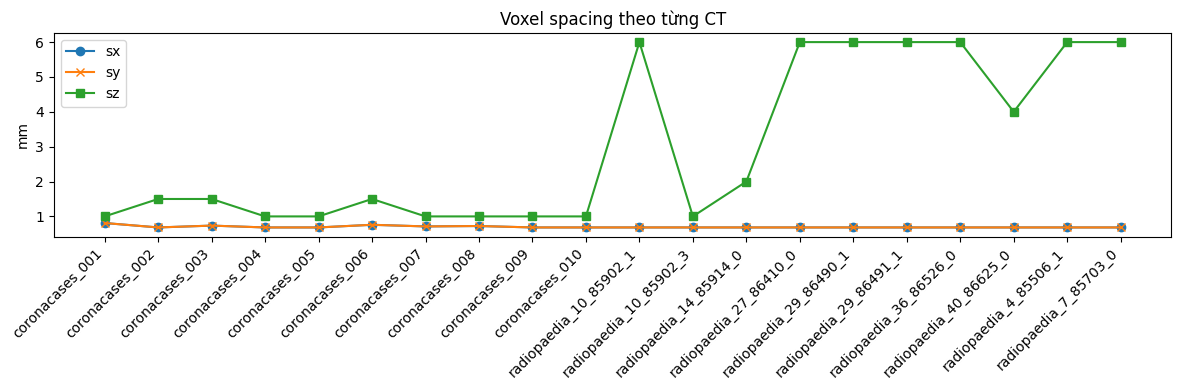

In [20]:
import matplotlib.pyplot as plt

case_ids = [cid for cid, _ in voxel_stats]
sx = [sp[0] for _, sp in voxel_stats]
sy = [sp[1] for _, sp in voxel_stats]
sz = [sp[2] for _, sp in voxel_stats]

plt.figure(figsize=(12, 4))
plt.plot(sx, marker='o', label='sx')
plt.plot(sy, marker='x', label='sy')
plt.plot(sz, marker='s', label='sz')
plt.xticks(range(len(case_ids)), case_ids, rotation=45, ha='right')
plt.ylabel("mm")
plt.title("Voxel spacing theo từng CT")
plt.legend()
plt.tight_layout()
plt.show()

#### (J) Kiểm tra giá trị HU range

In [21]:
import nibabel as nib
import numpy as np

hu_stats = []   # (case_id, hu_min, hu_max, p1, p99)

for ct_path in ct_files:  # đã có ct_files, basename_no_ext từ trước
    case_id = basename_no_ext(ct_path)
    arr = nib.load(ct_path).get_fdata().astype(np.float32)

    hu_min = float(arr.min())
    hu_max = float(arr.max())
    p1  = float(np.percentile(arr, 1))
    p99 = float(np.percentile(arr, 99))

    hu_stats.append((case_id, hu_min, hu_max, p1, p99))

print("===== HU RANGE TỪNG CASE =====\n")
for case_id, hu_min, hu_max, p1, p99 in hu_stats:
    print(f"{case_id:25s}  min={hu_min:8.1f}  max={hu_max:8.1f}  p1={p1:8.1f}  p99={p99:8.1f}")

# thống kê global
all_min  = min(s[1] for s in hu_stats)
all_max  = max(s[2] for s in hu_stats)
all_p1   = np.median([s[3] for s in hu_stats])
all_p99  = np.median([s[4] for s in hu_stats])

print("\n===== HU RANGE TOÀN BỘ DATASET =====")
print(f"Global min HU : {all_min:.1f}")
print(f"Global max HU : {all_max:.1f}")
print(f"Median p1 HU  : {all_p1:.1f}")
print(f"Median p99 HU : {all_p99:.1f}")

===== HU RANGE TỪNG CASE =====

coronacases_001            min= -1021.0  max=  2996.0  p1= -1020.0  p99=   455.0
coronacases_002            min= -1023.0  max=  9567.0  p1= -1023.0  p99=   626.0
coronacases_003            min= -1023.0  max=  8931.0  p1= -1023.0  p99=   678.0
coronacases_004            min= -1021.0  max=  2020.0  p1= -1021.0  p99=   478.0
coronacases_005            min= -1021.0  max=  5528.0  p1= -1021.0  p99=   526.0
coronacases_006            min= -1023.0  max=  2217.0  p1= -1023.0  p99=   581.0
coronacases_007            min= -1023.0  max=  2515.0  p1= -1023.0  p99=   631.0
coronacases_008            min= -1021.0  max=  8575.0  p1= -1021.0  p99=   484.0
coronacases_009            min= -1021.0  max=  1845.0  p1= -1021.0  p99=   523.0
coronacases_010            min= -1021.0  max=  1920.0  p1= -1021.0  p99=   522.0
radiopaedia_10_85902_1     min=     0.0  max=   255.0  p1=     0.0  p99=   255.0
radiopaedia_10_85902_3     min=     0.0  max=   255.0  p1=     0.0  p99=   25

#### (K) Thống kê label mask (Lung+Infection)

In [ ]:
from collections import Counter

cls_counter = Counter()   # đếm tổng pixel mỗi class trên toàn dataset
case_infect_voxels = []  # (case_id, n_lung, n_inf, n_total_voxels)

for mask_path in lung_inf_files:
    case_id = basename_no_ext(mask_path)
    arr = nib.load(mask_path).get_fdata()

    # unique + counts cho case này
    vals, counts = np.unique(arr, return_counts=True)
    local_cnt = dict(zip(vals.astype(int), counts))

    n_bg   = local_cnt.get(0, 0)
    n_lung = local_cnt.get(1, 0)
    n_inf2 = local_cnt.get(2, 0)
    n_inf3 = local_cnt.get(3, 0)
    n_inf  = n_inf2 + n_inf3
    n_all  = int(arr.size)

    case_infect_voxels.append((case_id, n_lung, n_inf, n_all))

    # cộng dồn toàn bộ
    for v, c in local_cnt.items():
        cls_counter[int(v)] += int(c)

print("===== LABEL COUNTS (toàn dataset) trong Lung_and_Infection_Mask =====")
total_vox = sum(cls_counter.values())
for v in sorted(cls_counter.keys()):
    print(f"Class {v}: {cls_counter[v]} voxels ({cls_counter[v]/total_vox*100:.3f}%)")

===== LABEL COUNTS (toàn dataset) trong Lung_and_Infection_Mask =====
Class 0: 930248275 voxels (90.017%)
Class 1: 44253889 voxels (4.282%)
Class 2: 49959387 voxels (4.834%)
Class 3: 8951513 voxels (0.866%)


In [24]:
import nibabel as nib
import numpy as np
from collections import Counter

lung_cls_counter = Counter()

print("===== LABEL COUNTS trong Lung_Mask =====")

for path in lung_files:
    arr = nib.load(path).get_fdata()
    vals, counts = np.unique(arr, return_counts=True)
    for v, c in zip(vals.astype(int), counts):
        lung_cls_counter[v] += int(c)

total_lung_vox = sum(lung_cls_counter.values())
for v in sorted(lung_cls_counter.keys()):
    print(f"Class {v}: {lung_cls_counter[v]} voxels ({lung_cls_counter[v]/total_lung_vox*100:.3f}%)")

===== LABEL COUNTS trong Lung_Mask =====
Class 0: 930248389 voxels (90.017%)
Class 1: 47950735 voxels (4.640%)
Class 2: 55213940 voxels (5.343%)


In [ ]:
inf_cls_counter = Counter()

print("===== LABEL COUNTS trong Infection_Mask =====")

for path in inf_files:
    arr = nib.load(path).get_fdata()
    vals, counts = np.unique(arr, return_counts=True)
    for v, c in zip(vals.astype(int), counts):
        inf_cls_counter[v] += int(c)

total_inf_vox = sum(inf_cls_counter.values())
for v in sorted(inf_cls_counter.keys()):
    print(f"Class {v}: {inf_cls_counter[v]} voxels ({inf_cls_counter[v]/total_inf_vox*100:.3f}%)")


===== LABEL COUNTS trong Infection_Mask =====
Class 0: 1024461551 voxels (99.134%)
Class 1: 8951513 voxels (0.866%)


#### (L) Tạo label classification từ mask (per-case)

In [23]:
case_labels = []  # (case_id, has_infection, lung_ratio, inf_ratio)

for case_id, n_lung, n_inf, n_all in case_infect_voxels:
    has_inf = int(n_inf > 0)
    lung_ratio = n_lung / n_all
    inf_ratio  = n_inf / n_all
    case_labels.append((case_id, has_inf, lung_ratio, inf_ratio))

print("===== CASE-LEVEL LABEL (DỰA TRÊN MASK LUNG+INF) =====\n")
n_pos = sum(1 for _, h, _, _ in case_labels if h == 1)
n_neg = len(case_labels) - n_pos
print(f"Số case có infection    : {n_pos}")
print(f"Số case KHÔNG infection : {n_neg}\n")

for cid, has_inf, lung_r, inf_r in case_labels:
    print(f"{cid:25s}  has_inf={has_inf}  lung_ratio={lung_r:.4f}  inf_ratio={inf_r:.4f}")

===== CASE-LEVEL LABEL (DỰA TRÊN MASK LUNG+INF) =====

Số case có infection    : 20
Số case KHÔNG infection : 0

coronacases_001            has_inf=1  lung_ratio=0.0263  inf_ratio=0.0378
coronacases_002            has_inf=1  lung_ratio=0.0567  inf_ratio=0.0692
coronacases_003            has_inf=1  lung_ratio=0.0239  inf_ratio=0.0583
coronacases_004            has_inf=1  lung_ratio=0.0627  inf_ratio=0.0746
coronacases_005            has_inf=1  lung_ratio=0.0598  inf_ratio=0.0740
coronacases_006            has_inf=1  lung_ratio=0.0447  inf_ratio=0.0471
coronacases_007            has_inf=1  lung_ratio=0.0405  inf_ratio=0.0475
coronacases_008            has_inf=1  lung_ratio=0.0386  inf_ratio=0.0537
coronacases_009            has_inf=1  lung_ratio=0.0392  inf_ratio=0.0451
coronacases_010            has_inf=1  lung_ratio=0.0216  inf_ratio=0.0402
radiopaedia_10_85902_1     has_inf=1  lung_ratio=0.0519  inf_ratio=0.0548
radiopaedia_10_85902_3     has_inf=1  lung_ratio=0.0514  inf_ratio=0.0542

#### (M) Kiểm tra giá trị pixel trong các mask

In [26]:
import nibabel as nib
import numpy as np
import glob
import os

def get_unique_values(file_list):
    uniques = set()
    for p in file_list:
        arr = nib.load(p).get_fdata()
        vals = np.unique(arr)
        uniques.update(vals.tolist())
    return sorted(list(uniques))

lung_vals = get_unique_values(lung_files)
inf_vals  = get_unique_values(inf_files)
li_vals   = get_unique_values(lung_inf_files)

print("===== UNIQUE PIXEL VALUES (GLOBAL) =====")
print("Lung_Mask                 :", lung_vals)
print("Infection_Mask            :", inf_vals)
print("Lung_and_Infection_Mask   :", li_vals)

===== UNIQUE PIXEL VALUES (GLOBAL) =====
Lung_Mask                 : [0.0, 1.0, 2.0]
Infection_Mask            : [0.0, 1.0]
Lung_and_Infection_Mask   : [0.0, 1.0, 2.0, 3.0]


In [27]:
# Kiểm tra unique values cho 1 case bất kỳ 
def inspect_mask_values(case_id):
    print(f"===== CHECK CASE: {case_id} =====")
    
    p_lung = os.path.join(MASK_LUNG_DIR, case_id + ".nii")
    p_inf  = os.path.join(MASK_INF_DIR, case_id + ".nii")
    p_li   = os.path.join(MASK_LUNG_INF_DIR, case_id + ".nii")

    arr_lung = nib.load(p_lung).get_fdata()
    arr_inf  = nib.load(p_inf).get_fdata()
    arr_li   = nib.load(p_li).get_fdata()

    print("Lung_Mask unique :", np.unique(arr_lung))
    print("Infection_Mask   :", np.unique(arr_inf))
    print("Lung+Inf_Mask    :", np.unique(arr_li))

# Example
inspect_mask_values("coronacases_001")


===== CHECK CASE: coronacases_001 =====
Lung_Mask unique : [0. 1. 2.]
Infection_Mask   : [0. 1.]
Lung+Inf_Mask    : [0. 1. 2. 3.]


In [28]:
# Kiểm tra unique values của từng slice (1 case)
def inspect_slice_values(case_id):
    print(f"\n===== SLICE UNIQUE VALUES: {case_id} =====")

    p_li = os.path.join(MASK_LUNG_INF_DIR, case_id + ".nii")
    arr = nib.load(p_li).get_fdata()
    
    H, W, Z = arr.shape
    for z in range(Z):
        u = np.unique(arr[:,:,z])
        print(f"slice {z:03d}  →  {u}")

inspect_slice_values("coronacases_001")



===== SLICE UNIQUE VALUES: coronacases_001 =====
slice 000  →  [0.]
slice 001  →  [0.]
slice 002  →  [0.]
slice 003  →  [0.]
slice 004  →  [0.]
slice 005  →  [0.]
slice 006  →  [0.]
slice 007  →  [0.]
slice 008  →  [0.]
slice 009  →  [0.]
slice 010  →  [0.]
slice 011  →  [0.]
slice 012  →  [0.]
slice 013  →  [0.]
slice 014  →  [0.]
slice 015  →  [0.]
slice 016  →  [0.]
slice 017  →  [0.]
slice 018  →  [0.]
slice 019  →  [0.]
slice 020  →  [0.]
slice 021  →  [0.]
slice 022  →  [0.]
slice 023  →  [0.]
slice 024  →  [0.]
slice 025  →  [0.]
slice 026  →  [0.]
slice 027  →  [0.]
slice 028  →  [0.]
slice 029  →  [0.]
slice 030  →  [0.]
slice 031  →  [0.]
slice 032  →  [0.]
slice 033  →  [0.]
slice 034  →  [0.]
slice 035  →  [0.]
slice 036  →  [0.]
slice 037  →  [0.]
slice 038  →  [0.]
slice 039  →  [0.]
slice 040  →  [0.]
slice 041  →  [0.]
slice 042  →  [0.]
slice 043  →  [0.]
slice 044  →  [0.]
slice 045  →  [0.]
slice 046  →  [0.]
slice 047  →  [0.]
slice 048  →  [0.]
slice 049  →  [0.]


In [29]:
# Thống kê số slice có phổi, số slice có infection
def slice_statistics(case_id):
    p_li = os.path.join(MASK_LUNG_INF_DIR, case_id + ".nii")
    arr = nib.load(p_li).get_fdata()

    H, W, Z = arr.shape
    n_lung_slices = 0
    n_inf_slices  = 0

    for z in range(Z):
        s = arr[:,:,z]
        if np.any((s == 1) | (s == 2)): 
            n_lung_slices += 1
        if np.any(s == 3):
            n_inf_slices += 1

    print(f"\n===== SLICE STATS: {case_id} =====")
    print(f"Số slice có lung      : {n_lung_slices}/{Z}")
    print(f"Số slice có infection : {n_inf_slices}/{Z}")

slice_statistics("coronacases_001")


===== SLICE STATS: coronacases_001 =====
Số slice có lung      : 227/301
Số slice có infection : 161/301
